# Neural Network -Problem Statement

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.


Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [2]:
gas_tur_df = pd.read_csv('gas_turbines.csv')

In [3]:
gas_tur_df.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.4874,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.6043,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.3943,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782


# EDA

In [4]:
gas_tur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
gas_tur_df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [6]:
gas_tur_df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
#No missing or null value found

# Data Visualization 

array([[<AxesSubplot:title={'center':'AT'}>,
        <AxesSubplot:title={'center':'AP'}>,
        <AxesSubplot:title={'center':'AH'}>],
       [<AxesSubplot:title={'center':'AFDP'}>,
        <AxesSubplot:title={'center':'GTEP'}>,
        <AxesSubplot:title={'center':'TIT'}>],
       [<AxesSubplot:title={'center':'TAT'}>,
        <AxesSubplot:title={'center':'TEY'}>,
        <AxesSubplot:title={'center':'CDP'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NOX'}>, <AxesSubplot:>]],
      dtype=object)

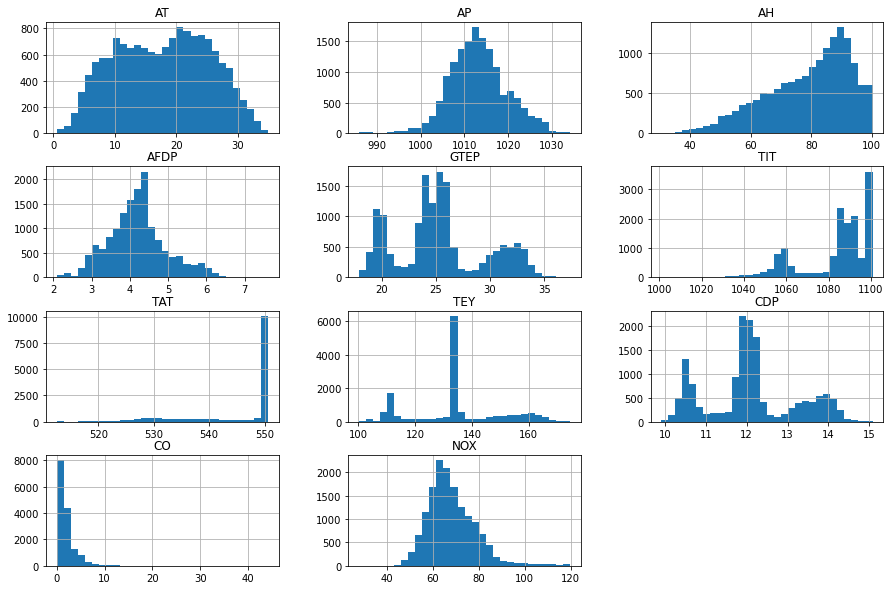

In [8]:
gas_tur_df.hist(bins=30, figsize=(15, 10))

In [9]:
# Not all the features are normally distributed, We need to normalize the data before training a model

<AxesSubplot:>

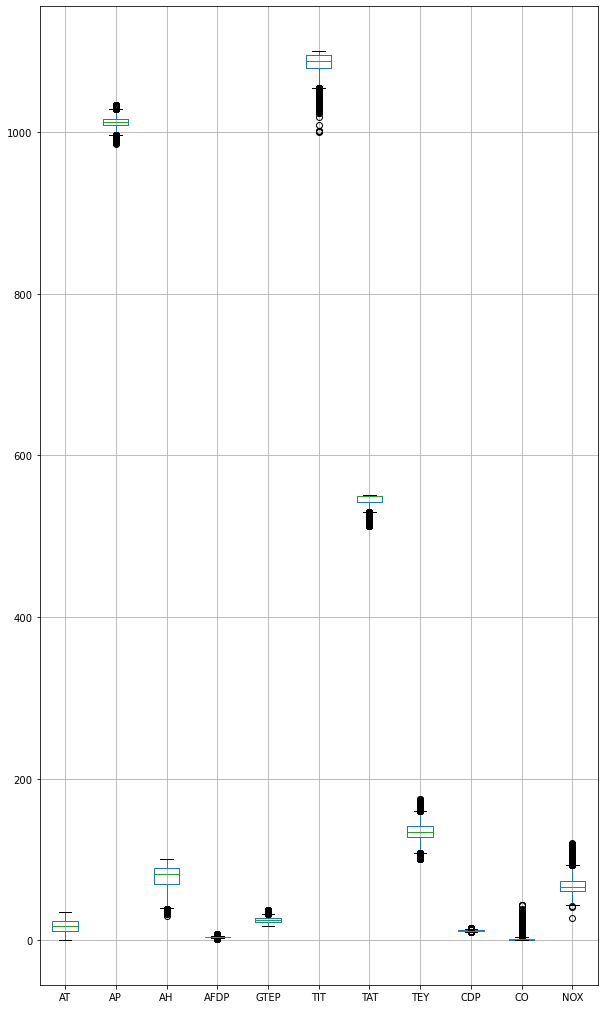

In [10]:
gas_tur_df.boxplot(figsize=(10, 18))

For most features outliers are present .We need to use mean absolute error (MAE) to evaluate the model 
in modeling. The MAE is not sensitive to the outliers

<AxesSubplot:>

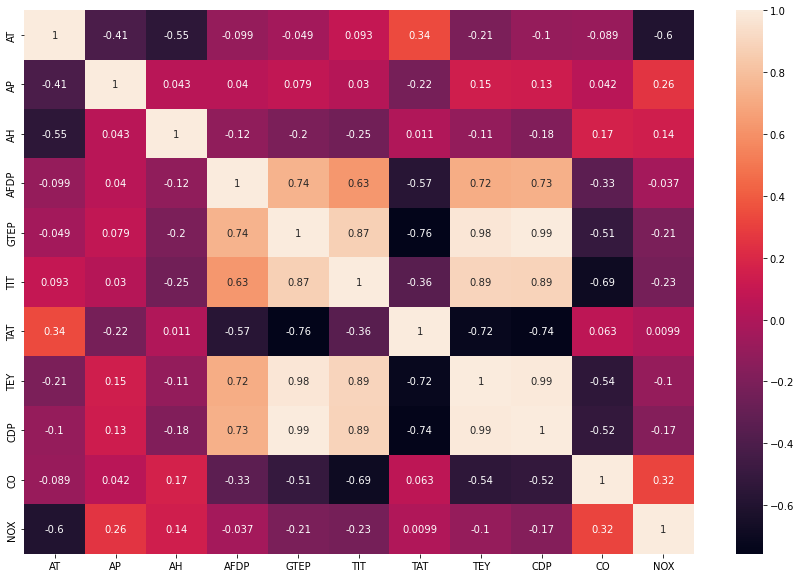

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(gas_tur_df.corr(),annot=True)

Most features are correlated with each other possitively as well as negatively like TEY is highly correlated with CDP,
 GTEP,TIT,AFDP and negativly correlated with TAT.
 TIT is positively correlated with CDP ,TIT,GTEP,AFDP and negatively correlatated with  CO

# Data Scaling

In [12]:
# Defining Independent and Dependent Variables
x = gas_tur_df.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
x.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,10.644,3.4874,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,10.656,3.6043,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,10.644,3.3943,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,11.679,1.9081,82.782


In [13]:
y= gas_tur_df.loc[:,['TEY']]
y.head(10)

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
5,114.72
6,114.71
7,114.71
8,114.72
9,131.70


In [14]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)



In [15]:
x_norm

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3, random_state=30)

In [17]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from keras.layers import Dense
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

In [18]:
pip install keras-tuner --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model


In [20]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',
                     max_trials=5,executions_per_trial=3,directory='project')

INFO:tensorflow:Reloading Tuner from project\untitled_project\tuner0.json


In [21]:
tuner.search_space_summary()

Search space summary
Default search space size: 22
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_6

In [22]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [23]:
tuner.results_summary()

Results summary
Results in project\untitled_project
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 1 summary
Hyperparameters:
num_layers: 6
units_0: 64
units_1: 64
learning_rate: 0.001
units_2: 96
units_3: 64
units_4: 32
units_5: 32
units_6: 96
units_7: 96
units_8: 96
units_9: 32
units_10: 32
units_11: 96
units_12: 32
units_13: 32
units_14: 64
units_15: 64
Score: 0.3942568600177765

Trial 2 summary
Hyperparameters:
num_layers: 18
units_0: 64
units_1: 96
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 64
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 96
units_10: 32
units_11: 64
units_12: 96
units_13: 32
units_14: 96
units_15: 96
units_16: 32
units_17: 32
Score: 0.45585860808690387

Trial 0 summary
Hyperparameters:
num_layers: 16
units_0: 32
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14

In [24]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(96,input_dim=10,activation='relu'))
    model1.add(Dense(96,activation='relu'))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))      
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [25]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [26]:
x_test.shape,y_test.shape

((4512, 10), (4512, 1))

In [27]:
grid_result = grid.fit(x_test,y_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-3.360 total time=   6.7s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-2.993 total time=   6.3s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-2.006 total time=   6.1s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-1.561 total time=   6.2s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-2.336 total time=   6.1s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

[CV 1/5; 11/16] END .batch_size=40, epochs=100;, score=-0.694 total time=  19.7s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................
[CV 2/5; 11/16] END .batch_size=40, epochs=100;, score=-0.961 total time=  29.2s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................
[CV 3/5; 11/16] END .batch_size=40, epochs=100;, score=-0.835 total time=  18.2s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................
[CV 4/5; 11/16] END .batch_size=40, epochs=100;, score=-0.821 total time=  17.0s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................
[CV 5/5; 11/16] END .batch_size=40, epochs=100;, score=-0.877 total time=  15.7s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................
[CV 1/5; 12/16] END .batch_size=40, epochs=200;, score=-0.520 total time=  36.2s
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................
[CV 2/5; 12/16] END .batch_s

In [28]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.6103006362915039, using {'batch_size': 20, 'epochs': 200}
-2.4511401891708373,0.6513771477511082 with: {'batch_size': 10, 'epochs': 10}
-1.3381933093070983,0.4677137228250734 with: {'batch_size': 10, 'epochs': 50}
-1.0061941146850586,0.4170008469917777 with: {'batch_size': 10, 'epochs': 100}
-0.8077394664287567,0.25909249288959724 with: {'batch_size': 10, 'epochs': 200}
-2.252234935760498,0.3082622016383843 with: {'batch_size': 20, 'epochs': 10}
-1.5091490507125855,0.9431840127142691 with: {'batch_size': 20, 'epochs': 50}
-0.9693213105201721,0.2960888780294594 with: {'batch_size': 20, 'epochs': 100}
-0.6103006362915039,0.09391930486302813 with: {'batch_size': 20, 'epochs': 200}
-3.0555817127227782,0.3007403127397626 with: {'batch_size': 40, 'epochs': 10}
-1.136705708503723,0.1686504561803675 with: {'batch_size': 40, 'epochs': 50}
-0.8373983860015869,0.08686493108315069 with: {'batch_size': 40, 'epochs': 100}
-0.615260910987854,0.11452938859212376 with: {'batch_size': 40, 'epo

In [29]:
def baseline_model():
    model_final = Sequential()
    model_final.add(Dense(96,input_dim=10,activation='relu'))
    model_final.add(Dense(96,activation='relu'))
    model_final.add(Dense(64,activation="relu"))
    model_final.add(Dense(64,activation="relu"))
    model_final.add(Dense(64,activation="relu"))
    model_final.add(Dense(32,activation="relu"))      
    model_final.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model_final.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model_final

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=200, batch_size=10, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator,x_test, y_test, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -7.81 (1.60) MSE


In [32]:
estimator.fit(x_train, y_train)
prediction = estimator.predict(x_test)

In [33]:
prediction

array([134.23903, 108.97675, 130.87932, ..., 131.44208, 123.9493 ,
       169.46455], dtype=float32)